In [7]:
from xml.dom import minidom
from scipy import stats
from scipy.stats import shapiro 
from scipy.stats import friedmanchisquare, wilcoxon, mannwhitneyu, ranksums
import itertools
import glob, os
import numpy as np
import statistics as s
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scikit_posthocs as sp
import scipy as scipy
import pingouin as pg

### Count operations in forced and voting commits

In [8]:
# forced commit
forced_tasks_names= [
    ["Log-16-01-2023_17-25-09", "1C"], 
    ["Log-16-01-2023_17-21-57", "1S"],
    ["Log-17-01-2023_16-57-25", "3C"],
    ["Log-17-01-2023_16-57-09", "3S"],
    ["Log-18-01-2023_16-11-16", "5C"],
    ["Log-18-01-2023_16-11-08", "5S"],
    ["Log-19-01-2023_12-45-29", "7C"],
    ["Log-19-01-2023_12-45-20", "7S"],
    ["Log-20-01-2023_14-08-04", "9C"],
    ["Log-20-01-2023_14-08-26", "9S"],
    ["Log-17-01-2023_16-06-17", "2C"],
    ["Log-17-01-2023_16-06-26", "2S"],
    ["Log-18-01-2023_15-32-39", "4C"],
    ["Log-18-01-2023_15-33-03", "4S"],
    ["Log-19-01-2023_11-31-36", "6C"],
    ["Log-19-01-2023_11-31-25", "6S"],
    ["Log-19-01-2023_14-56-36", "8C"],
    ["Log-19-01-2023_14-56-33", "8S"],
    ["Log-20-01-2023_17-38-14", "10C"],
    ["Log-20-01-2023_17-38-11", "10S"]
]

# voting commit
voting_tasks_names=[
    ["Log-17-01-2023_15-52-12", "2C"],
    ["Log-17-01-2023_15-52-19", "2S"],
    ["Log-18-01-2023_15-19-49", "4C"],
    ["Log-18-01-2023_15-20-04", "4S"],
    ["Log-18-01-2023_17-43-43", "6C"],
    ["Log-18-01-2023_17-43-21", "6S"],
    ["Log-19-01-2023_14-40-23", "8C"],
    ["Log-19-01-2023_14-40-43", "8S"],
    ["Log-20-01-2023_17-21-15", "10C"],
    ["Log-20-01-2023_17-20-28", "10S"],
    ["Log-16-01-2023_17-41-21", "1C"],
    ["Log-16-01-2023_17-40-47", "1S"],
    ["Log-17-01-2023_17-13-31", "3C"],
    ["Log-17-01-2023_17-13-19", "3S"],
    ["Log-18-01-2023_16-25-03", "5C"],
    ["Log-18-01-2023_16-24-56", "5S"],
    ["Log-19-01-2023_13-07-10", "7C"],
    ["Log-19-01-2023_13-07-01", "7S"],
    ["Log-20-01-2023_14-25-38", "9C"],
    ["Log-20-01-2023_14-25-44", "9S"]
]

In [9]:
forced_tasks_operations_df = []
voting_tasks_operations_df = []

forced_tasks_operations_df.clear()
voting_tasks_operations_df.clear()

# use glob to get all the csv files in the folder
path = "UserLogs/BetterCleanedLogs/Operations"
csv_files = glob.glob(os.path.join(path, "*.txt"))
df = pd.DataFrame()
  
# loop over the list of csv files
for f in csv_files:
      
    # read the csv file
    columns_names= ['DateTime', 'OperationType', 'ObjGuid', 'ObjName']
    df = pd.read_csv(f, sep=";", header=None, names = columns_names)
    
    # print the location and filename
    filename= f.split("\\")[-1]
    '''
    print('Location:', f)    
    print('File Name:', filename)
      
    # print the content
    
    print('Content:')    
    display(df)    
    '''
    
    if any((match := substring)[0] in filename for substring in forced_tasks_names): #if current file is a voting task log
        df["FileName"] = match[0]
        df["UserId"] = match[1]
        forced_tasks_operations_df.append(df);
        
    if any((match := substring)[0] in filename for substring in voting_tasks_names): #if current file is a voting task log
        df["FileName"] = match[0]
        df["UserId"] = match[1]
        voting_tasks_operations_df.append(df);
        
    '''
    # fill lists
    if any(x[0] in filename for x in forced_tasks_names): #if current file is a forced task log
        forced_tasks_operations_df.append(df);
    if any(x[0] in filename for x in voting_tasks_names): #if current file is a voting task log
        voting_tasks_operations_df.append(df);
    '''

#### Forced tasks operations

In [10]:
# forced tasks - count
'''
* forced commits 
& forced deletion 
'''

forced_counts_series = pd.Series(dtype = 'object')
forced_counts_series = forced_counts_series[0:0]

for df in forced_tasks_operations_df:
    forced_counts_series = forced_counts_series.add(df["OperationType"].value_counts(), fill_value=0)
    #display(df)
    
print(forced_counts_series)



AcceptDeletion            1.0
ForcedCommit            106.0
ForcedGlobalDeletion      3.0
RequestCommit             7.0
dtype: object


#### Voting tasks operations

In [11]:
# voting tasks - count
'''
% request commits
! request commit accepted
$ request commit rejected

? request deletion
+ request deletion accepted
= request deletion rejected
'''

voting_counts_series = pd.Series(dtype = 'object')
voting_counts_series = voting_counts_series[0:0]

for df in voting_tasks_operations_df:
    voting_counts_series = voting_counts_series.add(df["OperationType"].value_counts(), fill_value=0)
    #display(df)
    
print(voting_counts_series)

AcceptCommit             66.0
AcceptDeletion            1.0
DeclineCommit             3.0
ForcedCommit              3.0
RequestCommit            96.0
RequestGlobalDeletion     1.0
dtype: object


### Time in Global or Local layer

In [12]:
forced_tasks_logs_df = []
voting_tasks_logs_df = []

forced_tasks_logs_df.clear()
voting_tasks_logs_df.clear()

# use glob to get all the csv files in the folder
path = "UserLogs/CleanedLogs/UserLogs"
csv_files = glob.glob(os.path.join(path, "*.txt"))
df = pd.DataFrame()

# loop over the list of csv files
for f in csv_files:
      
    # read the csv file
    columns_names= ['DateTime', 'SequenceNum', 'CurrentLayer', 'GazeDirection', 'GazeOrigin',
                'GazeTargetObjGuid', 'GazeTargetObjName', 'HeadPosition', 'Headdirection',
                'HeadRotation', 'CurrentManipObjGuid', 'CurrentManipObjName'];

    df = pd.read_csv(f, sep=";", header=None, names = columns_names)
    
    # print the location and filename
    filename= f.split("\\")[-1]
    '''
    print('Location:', f)    
    print('File Name:', filename)
      
    # print the content
    print('Content:')    
    display(df)
    '''
    # fill lists        
    if any((match := substring)[0] in filename for substring in forced_tasks_names):
        df["FileName"] = match[0]
        df["UserId"] = match[1]
        forced_tasks_logs_df.append(df);
        
    if any((match := substring)[0] in filename for substring in voting_tasks_names): #if current file is a voting task log
        df["FileName"] = match[0]
        df["UserId"] = match[1]
        voting_tasks_logs_df.append(df);

#### Forced tasks times in total

In [13]:
# forced tasks - count total time

forced_count_time_series = pd.Series(dtype = 'object')
forced_count_time_series = forced_count_time_series[0:0]

for df in forced_tasks_logs_df:
    forced_count_time_series = forced_count_time_series.add(df["CurrentLayer"].value_counts(), fill_value=0)
    #display(df)
    
print(forced_count_time_series)

print("\nPercentage:")
global_time_forced = forced_count_time_series["GlobalLayer"]
local_time_forced = forced_count_time_series["LocalLayer"]

global_perc = (global_time_forced * 100)/(global_time_forced + local_time_forced)
print("In global layer:", global_perc)

local_perc = (local_time_forced * 100)/(global_time_forced + local_time_forced)
print("In local layer:", local_perc)

LocalLayer     6594
GlobalLayer    2168
dtype: object

Percentage:
In global layer: 24.743209312942252
In local layer: 75.25679068705774


#### Voting tasks times in total

In [14]:
# voting tasks - count total time

voting_count_time_series = pd.Series(dtype = 'object')
voting_count_time_series = voting_count_time_series[0:0]

for df in voting_tasks_logs_df:
    voting_count_time_series = voting_count_time_series.add(df["CurrentLayer"].value_counts(), fill_value=0)
    #display(df)
    
print(voting_count_time_series)

print("\nPercentage:")
global_time_voting = voting_count_time_series["GlobalLayer"]
local_time_voting = voting_count_time_series["LocalLayer"]

global_perc = (global_time_voting * 100)/(global_time_voting + local_time_voting)
print("In global layer:", global_perc)

local_perc = (local_time_voting * 100)/(global_time_voting + local_time_voting)
print("In local layer:", local_perc)

GlobalLayer    3446
LocalLayer     6424
dtype: object

Percentage:
In global layer: 34.91388044579534
In local layer: 65.08611955420466


#### Forced tasks times by user

In [15]:
# forced tasks - count user time

forced_count_time_user_df_list = []
forced_count_time_user_df_list.clear()

forced_count_time_user_df = pd.DataFrame()

for df in forced_tasks_logs_df:
    forced_count_time_user_df = df["CurrentLayer"].value_counts().to_frame();
    forced_count_time_user_df.rename(columns = {"CurrentLayer": "Count"})
    forced_count_time_user_df["UserId"] = df["UserId"][0]
    forced_count_time_user_df["FileName"] = df["FileName"][0]
    forced_count_time_user_df["Percentage"] = 0
    
    global_time_user_forced = forced_count_time_user_df.loc["GlobalLayer", "CurrentLayer"]
    local_time_user_forced = forced_count_time_user_df.loc["LocalLayer", "CurrentLayer"]
    
    forced_count_time_user_df.loc["GlobalLayer", "Percentage"] = (global_time_user_forced * 100)/(global_time_user_forced + local_time_user_forced);
    forced_count_time_user_df.loc["LocalLayer", "Percentage"] = (local_time_user_forced * 100)/(global_time_user_forced + local_time_user_forced);
    #display(forced_count_time_user_df)
    
    forced_count_time_user_df_list.append(forced_count_time_user_df)
    forced_count_time_user_df = pd.DataFrame

In [16]:
# voting tasks - count user time

voting_count_time_user_df_list = []
voting_count_time_user_df_list.clear()

voting_count_time_user_df = pd.DataFrame()

for df in voting_tasks_logs_df:
    voting_count_time_user_df = df["CurrentLayer"].value_counts().to_frame();
    voting_count_time_user_df["UserId"] = df["UserId"][0]
    voting_count_time_user_df["FileName"] = df["FileName"][0]
    voting_count_time_user_df["Percentage"] = 0
    
    global_time_user_voting = voting_count_time_user_df.loc["GlobalLayer", "CurrentLayer"]
    local_time_user_voting = voting_count_time_user_df.loc["LocalLayer", "CurrentLayer"]
    
    voting_count_time_user_df.loc["GlobalLayer", "Percentage"] = (global_time_user_voting * 100)/(global_time_user_voting + local_time_user_voting);
    voting_count_time_user_df.loc["LocalLayer", "Percentage"] = (local_time_user_voting * 100)/(global_time_user_voting + local_time_user_voting);
    #display(voting_count_time_user_df)
    
    voting_count_time_user_df_list.append(voting_count_time_user_df)
    voting_count_time_user_df = pd.DataFrame

In [17]:
# create dataframes indexed by user with percentages

count_time_user_df = pd.DataFrame()

count_time_user_df["UserId"] = ''
count_time_user_df["GlobalTime"] = 0
count_time_user_df["GlobalTimePerc"] = 0
count_time_user_df["LocalTime"] = 0
count_time_user_df["LocalTimePerc"] = 0
count_time_user_df["LocalTime"] = 0
count_time_user_df["TaskType"] = ''
count_time_user_df["Filename"] = ''

for df in forced_count_time_user_df_list:
    toAdd = {"UserId": df.loc["GlobalLayer", "UserId"], 
            "GlobalTime": df.loc["GlobalLayer", "CurrentLayer"],
            "GlobalTimePerc": df.loc["GlobalLayer", "Percentage"],
            "LocalTime": df.loc["LocalLayer", "CurrentLayer"],
            "LocalTimePerc": df.loc["LocalLayer", "Percentage"],
            "TaskType": "Forced",
            "Filename": df.loc["GlobalLayer", "FileName"]
           }
    
    toAdd_df = pd.DataFrame(toAdd, index = [0])
    count_time_user_df = pd.concat([count_time_user_df, toAdd_df], ignore_index = True)

for df in voting_count_time_user_df_list:
    toAdd = {"UserId": df.loc["GlobalLayer", "UserId"], 
            "GlobalTime": df.loc["GlobalLayer", "CurrentLayer"],
            "GlobalTimePerc": df.loc["GlobalLayer", "Percentage"],
            "LocalTime": df.loc["LocalLayer", "CurrentLayer"],
            "LocalTimePerc": df.loc["LocalLayer", "Percentage"],
            "TaskType": "Voting",
            "Filename": df.loc["GlobalLayer", "FileName"]
           }
    
    toAdd_df = pd.DataFrame(toAdd, index = [0])    
    count_time_user_df = pd.concat([count_time_user_df, toAdd_df], ignore_index = True)

    
count_time_user_df.sort_values(by=['UserId'])
count_time_user_df

,UserId,GlobalTime,GlobalTimePerc,LocalTime,LocalTimePerc,TaskType,Filename
0,1S,213,35.500000,387,64.500000,Forced,Log-16-01-2023_17-21-57
1,1C,224,37.333333,376,62.666667,Forced,Log-16-01-2023_17-25-09
2,2C,57,18.811881,246,81.188119,Forced,Log-17-01-2023_16-06-17
3,2S,81,26.732673,222,73.267327,Forced,Log-17-01-2023_16-06-26
4,3S,128,27.947598,330,72.052402,Forced,Log-17-01-2023_16-57-09
5,3C,59,12.882096,399,87.117904,Forced,Log-17-01-2023_16-57-25
6,4C,140,42.813456,187,57.186544,Forced,Log-18-01-2023_15-32-39
7,4S,77,23.547401,250,76.452599,Forced,Log-18-01-2023_15-33-03
8,5S,69,24.468085,213,75.531915,Forced,Log-18-01-2023_16-11-08
9,5C,66,23.404255,216,76.595745,Forced,Log-18-01-2023_16-11-16


#### Group by user

In [18]:
count_time_user_df.groupby(["UserId"]).mean(numeric_only=True)

,GlobalTime,GlobalTimePerc,LocalTime,LocalTimePerc
UserId,,,,
10C,88.0,17.054230,428.5,82.945770
10S,205.0,39.759027,311.5,60.240973
1C,201.0,36.466667,349.0,63.533333
1S,212.5,38.950000,337.5,61.050000
2C,84.5,19.624919,341.0,80.375081
2S,162.0,35.537869,263.5,64.462131
3C,90.0,19.855682,364.5,80.144318
3S,127.0,27.942757,327.5,72.057243
4C,140.0,38.690678,226.0,61.309322


#### Plots of the single users times only considering global percentage (since local ones are specular)
x: forced

y: voting

In [19]:
# Create dataframe to plot, where each rows has the userid, the global forced percentage and the global voting percentage

forced_global_perc = count_time_user_df.loc[count_time_user_df["TaskType"] == "Forced"][["UserId", "GlobalTimePerc"]]
forced_global_perc.rename(columns = {"GlobalTimePerc": "GlobalTimePercForced"}, inplace=True)

voting_global_perc = count_time_user_df.loc[count_time_user_df["TaskType"] == "Voting"][["UserId", "GlobalTimePerc"]]
voting_global_perc.rename(columns = {"GlobalTimePerc": "GlobalTimePercVoting"}, inplace=True)

merged_global_perc = pd.merge(forced_global_perc, voting_global_perc)
merged_global_perc

,UserId,GlobalTimePercForced,GlobalTimePercVoting
0,1S,35.500000,42.400000
1,1C,37.333333,35.600000
2,2C,18.811881,20.437956
3,2S,26.732673,44.343066
4,3S,27.947598,27.937916
5,3C,12.882096,26.829268
6,4C,42.813456,34.567901
7,4S,23.547401,47.160494
8,5S,24.468085,18.852459
9,5C,23.404255,40.983607


                      GlobalTimePercForced  GlobalTimePercVoting
GlobalTimePercForced               1.00000               0.47613
GlobalTimePercVoting               0.47613               1.00000


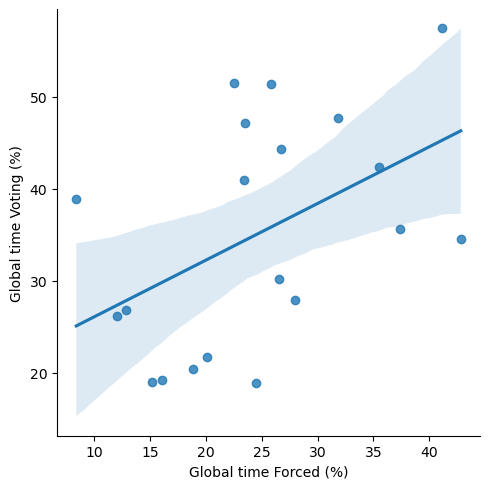

In [20]:
# feed to plot GlobalTimePercForced column on x and GlobalTimePercVoting column on y

g = sns.lmplot(x="GlobalTimePercForced", y="GlobalTimePercVoting", data = merged_global_perc);
g.set(xlabel='Global time Forced (%)', ylabel='Global time Voting (%)')
print(merged_global_perc.corr(method="pearson", numeric_only = True))

Text(0, 0.5, 'Global time Voting (%)')

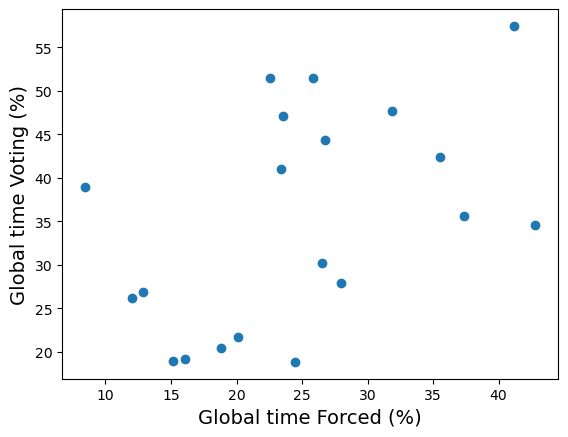

In [21]:
# same but just scatter

plt.scatter(x = merged_global_perc["GlobalTimePercForced"], y=merged_global_perc["GlobalTimePercVoting"])
plt.xlabel('Global time Forced (%)', fontsize=14)
plt.ylabel('Global time Voting (%)', fontsize=14)

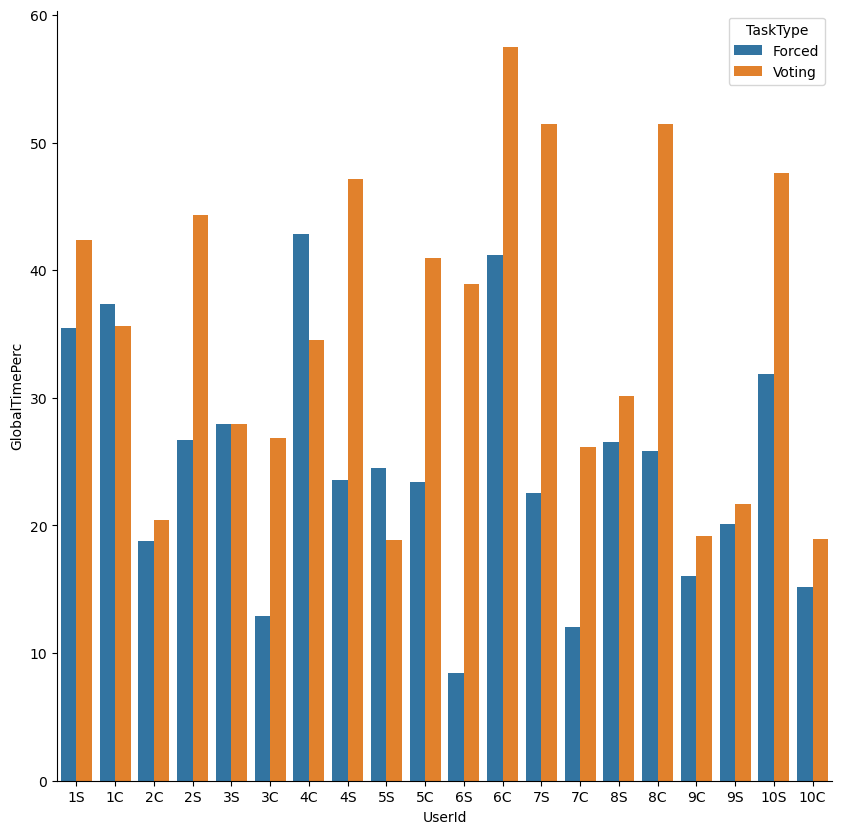

In [22]:
# barplot by single user - percentage in global layer divided by forced and voting commit

fig, ax1 = plt.subplots(figsize=(10, 10))
g = sns.barplot(x='UserId', y='GlobalTimePerc', hue='TaskType', data=count_time_user_df)
sns.despine(fig)

### Correlation between time talking and number of commits per user task

In [23]:
collaborative_data = pd.read_csv("Collaborative.csv")

talking_time = collaborative_data[["Subject ID", "time", "talking", "Method"]]
talking_time.rename(columns = {"time": "TalkingTime", "talking": "TalkingTimePerc", "Method": "TaskType"}, inplace=True)

talking_time.loc[talking_time["TaskType"] == "Forced commit", "TaskType"] = "Forced"
talking_time.loc[talking_time["TaskType"] == "Voting commit", "TaskType"] = "Voting"
talking_time

C:\Users\pdebb\AppData\Local\Temp\ipykernel_13356\3298247454.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  talking_time.rename(columns = {"time": "TalkingTime", "talking": "TalkingTimePerc", "Method": "TaskType"}, inplace=True)


,Subject ID,TalkingTime,TalkingTimePerc,TaskType
0,1S,600,35.50,Forced
1,1C,600,35.50,Forced
2,1S,500,44.60,Voting
3,1C,500,44.60,Voting
4,2C,548,25.18,Voting
5,2S,548,25.18,Voting
6,2S,303,23.10,Forced
7,2C,303,23.10,Forced
8,3S,458,31.00,Forced
9,3C,458,31.00,Forced


### modifiche al lvl globale forced

In [42]:
global_layer_forced_changes_df = pd.concat(forced_tasks_operations_df, ignore_index = True)
global_layer_forced_changes_df.drop(global_layer_forced_changes_df[(global_layer_forced_changes_df.OperationType != "ForcedCommit") & (global_layer_forced_changes_df.OperationType != "ForcedGlobalDeletion")].index, inplace=True)

global_layer_forced_changes_count_df = global_layer_forced_changes_df.groupby(["UserId", "OperationType"]).count()
global_layer_forced_changes_count_reset_df = global_layer_forced_changes_count_df.reset_index()

global_layer_forced_changes_count_reset_df["UserId"] = global_layer_forced_changes_count_reset_df["UserId"].apply(lambda x: str(x)[:len(x)-1])
global_layer_forced_changes_count_group_df = global_layer_forced_changes_count_reset_df.groupby(["UserId"]).sum(numeric_only=True)

gl_force_count_pair = global_layer_forced_changes_count_group_df["DateTime"]
gl_force_count_pair_array = np.array(gl_force_count_pair.to_numpy()).tolist()
gl_force_count_pair_array

[13, 15, 8, 8, 9, 8, 4, 12, 13, 19]

### modifiche al lvl globale voting

In [43]:
global_layer_voting_changes_df = pd.concat(voting_tasks_operations_df, ignore_index = True)
global_layer_voting_changes_df.drop(global_layer_voting_changes_df[(global_layer_voting_changes_df.OperationType != "AcceptCommit") & (global_layer_voting_changes_df.OperationType != "AcceptDeletion")].index, inplace=True)

global_layer_voting_changes_count_df = global_layer_voting_changes_df.groupby(["UserId", "OperationType"]).count()
global_layer_voting_changes_count_reset_df = global_layer_voting_changes_count_df.reset_index()

global_layer_voting_changes_count_reset_df["UserId"] = global_layer_voting_changes_count_reset_df["UserId"].apply(lambda x: str(x)[:len(x)-1])
global_layer_voting_changes_count_group_df = global_layer_voting_changes_count_reset_df.groupby(["UserId"]).sum(numeric_only=True)

gl_voting_count_pair = global_layer_voting_changes_count_group_df["DateTime"]
gl_voting_count_pair_array = np.array(gl_voting_count_pair.to_numpy()).tolist()
gl_voting_count_pair_array

[7, 10, 7, 6, 6, 6, 4, 6, 7, 8]

### num commit forced

In [45]:
operations_forced_df = pd.concat(forced_tasks_operations_df, ignore_index = True)
operations_forced_df.drop(operations_forced_df[operations_forced_df.OperationType != "ForcedCommit"].index, inplace=True)

operation_forced_count_df = operations_forced_df.groupby(["UserId", "OperationType"]).count()
operation_forced_count_reset_df = operation_forced_count_df.reset_index()

operation_forced_count_reset_df["UserId"] = operation_forced_count_reset_df["UserId"].apply(lambda x: str(x)[:len(x)-1])
operation_forced_count_group_df = operation_forced_count_reset_df.groupby(["UserId"]).sum(numeric_only=True)

op_count_forced_by_pair = operation_forced_count_group_df["DateTime"]
op_count_forced_by_pair_array = np.array(op_count_forced_by_pair.to_numpy()).tolist()
op_count_forced_by_pair_array

[13, 13, 8, 7, 9, 8, 4, 12, 13, 19]

### num commit voting

In [49]:
operations_voting_df = pd.concat(voting_tasks_operations_df, ignore_index = True)
operations_voting_df.drop(operations_voting_df[(operations_voting_df.OperationType != "RequestCommit")].index, inplace=True)

operation_voting_count_df = operations_voting_df.groupby(["UserId", "OperationType"]).count()
operation_voting_count_reset_df = operation_voting_count_df.reset_index()

operation_voting_count_reset_df["UserId"] = operation_voting_count_reset_df["UserId"].apply(lambda x: str(x)[:len(x)-1])
operation_voting_count_group_df = operation_voting_count_reset_df.groupby(["UserId"]).sum(numeric_only=True)

op_count_voting_by_pair = operation_voting_count_group_df["DateTime"]
op_count_voting_by_pair_array = np.array(op_count_voting_by_pair.to_numpy()).tolist()
op_count_voting_by_pair_array

[8, 10, 8, 11, 7, 6, 5, 18, 9, 14]

### test su modifiche lvl globali

In [50]:
shapiro(gl_force_count_pair_array + gl_voting_count_pair_array)
# con pvalue min < di 0.05: NON sono normalmente distribuiti -> wilcoxon

ShapiroResult(statistic=0.8884949088096619, pvalue=0.02523503638803959)

In [51]:
pg.wilcoxon(gl_force_count_pair_array, gl_voting_count_pair_array)

C:\tools\miniconda3\lib\site-packages\scipy\stats\_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\tools\miniconda3\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


,W-val,alternative,p-val,RBC,CLES
Wilcoxon,0.0,two-sided,0.008849,1.0,0.85


In [52]:
pg.mwu(gl_force_count_pair_array, gl_voting_count_pair_array, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,85.0,two-sided,0.008443,-0.7,0.85


#### plot

(array([ 2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 [Text(0, 2.0, '2'),
  Text(0, 4.0, '4'),
  Text(0, 6.0, '6'),
  Text(0, 8.0, '8'),
  Text(0, 10.0, '10'),
  Text(0, 12.0, '12'),
  Text(0, 14.0, '14'),
  Text(0, 16.0, '16'),
  Text(0, 18.0, '18'),
  Text(0, 20.0, '20')])

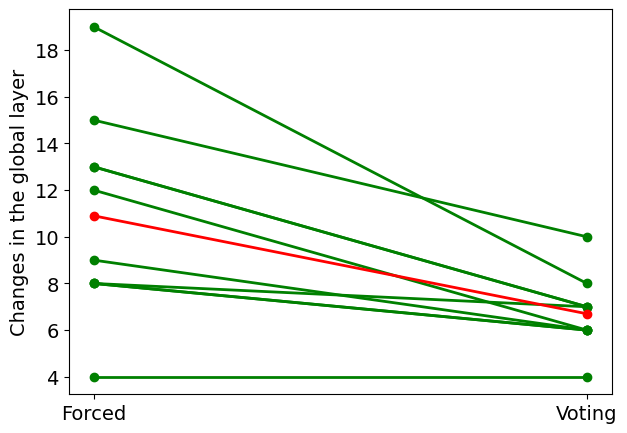

In [56]:
fig, ax = plt.subplots(figsize=(7,5))

ax.plot(["Forced", "Voting"], [gl_force_count_pair_array, gl_voting_count_pair_array], 'go-', linewidth=2)
ax.plot(["Forced", "Voting"], [np.mean(gl_force_count_pair_array), np.mean(gl_voting_count_pair_array)], 'ro-', linewidth=2)

plt.ylabel('Changes in the global layer', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

### test su num commit

In [57]:
shapiro(op_count_forced_by_pair_array + op_count_voting_by_pair_array)
# con pvalue mag > di 0.05: SONO normalmente distribuiti -> t test

ShapiroResult(statistic=0.9408917427062988, pvalue=0.24925664067268372)

In [58]:
# t test include l'ipotesi di normalità
pg.ttest(op_count_forced_by_pair_array, op_count_voting_by_pair_array)

# p è maggiore di 0.05: non c'è differenza tra le due medie, ma non sappiamo se sono uguali

# non possiamo dire che siano diversi con sufficiente sicurezza perchè il p value non è abbastanza basso da 
#darci la quasi-certezza che le medie non siano diverse per caso 
#(caso: misurazioni e casualmente scono diverse, non perchè c'è una differenza sistematica nei dati)

#non posso dire che sono diversi, ma magari sono equivalenti

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.546994,18,two-sided,0.591101,"[-2.84, 4.84]",0.244623,0.442,0.081309


In [59]:
# test di equivalenza per vedere se sono uguali
pg.tost(op_count_forced_by_pair_array, op_count_voting_by_pair_array)
# non possiamo dire che sono uguali (come sopra)

,bound,dof,pval
TOST,1,18,0.5


In [60]:
op_count_forced_by_pair_array

[13, 13, 8, 7, 9, 8, 4, 12, 13, 19]

In [61]:
op_count_voting_by_pair_array

[8, 10, 8, 11, 7, 6, 5, 18, 9, 14]